In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.naver.com/'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.select_one(
        '#NM_THEME_CONTAINER > div:nth-child(1) > div > ul > li:nth-child(3) > a.theme_info > strong')
    print(title)
else :
    print(response.status_code)

None


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("glass.csv")

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df["Type_str"]=df["Type"].apply(str)

df_x1 = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
df_y1 = df[['Type_str']]

rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)

x_train, x_test, y_train, y_test = train_test_split(
    df_x1,df_y1,test_size=0.4,random_state=10)

kfold_scores_1 = cross_val_score(rnf_model, x_train, y_train, cv = 7)

print('k-fold 교차 검증 SCORE : ', kfold_scores_1)
print("k-fold 교차 검증 SCORE 평균 : {:.2f}".format(kfold_scores_1.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

k-fold 교차 검증 SCORE :  [0.89473684 0.68421053 0.61111111 0.55555556 0.94444444 0.72222222
 0.88888889]
k-fold 교차 검증 SCORE 평균 : 0.76


In [6]:
df["Type_str"]=df["Type"].apply(str)
df_x2 = np.array(df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']])
df_y2 = df['Type_str']

kfold = KFold(n_splits=7, shuffle = True, random_state = 37)
kfold_scores_2_mean = []
fold_idx = 0

for train_idx, test_idx in kfold.split(df_x2):

    train_x, train_y = df_x2[train_idx], df_y2[train_idx]
    test_x, test_y = df_x2[test_idx], df_y2[test_idx]

    rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
    rnf_model.fit(train_x, train_y)
    pred_y = rnf_model.predict(test_x)
    kfold_scores_2 = accuracy_score(test_y, pred_y)
    fold_idx += 1
    kfold_scores_2_mean.append(kfold_scores_2)

print(f"k-fold 교차 검증 SCORE 평균 : {np.mean(kfold_scores_2_mean)}")

k-fold 교차 검증 SCORE 평균 : 0.7526881720430108


In [7]:
rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
rnf_model.fit(train_x, train_y)
pred_y = rnf_model.predict(test_x)

loocv = LeaveOneOut()
loocv_scores = cross_val_score(rnf_model,test_x,test_y, cv = loocv)

print("테스트 셋 전체 관측치 수 : ", len(test_y))
print("LOOCV 검증 분할 횟수 : ", len(loocv_scores))
print("LOOCV 교차 검증 SCORE 평균 : {:.2f}".format(loocv_scores.mean()))

테스트 셋 전체 관측치 수 :  30
LOOCV 검증 분할 횟수 :  30
LOOCV 교차 검증 SCORE 평균 : 0.70


In [8]:
strati = StratifiedKFold(n_splits=3)

n_iter=0
print("전체 데이터셋 범주 별 관측치 수 :\n",df_y2.value_counts())
for train_index, test_index in strati.split(df_x2,df_y2):
    n_iter +=1
    strati_train_y = df_y2.iloc[train_index]
    strati_test_y = df_y2.iloc[test_index]
    print('분할 {0}'.format(n_iter))
    print('학습 셋 범주 별 관측치 수:\n', strati_train_y.value_counts())
    print('검증 셋 범주 별 관측치 수:\n', strati_test_y.value_counts())

strati_scores = cross_val_score(rnf_model,test_x,test_y, cv = strati)
print("Stratified K-fold 교차 검증 SCORE 평균 : {:.2f}".format(strati_scores.mean()))

전체 데이터셋 범주 별 관측치 수 :
 2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_str, dtype: int64
분할 1
학습 셋 범주 별 관측치 수:
 2    51
1    46
7    19
3    11
5     9
6     6
Name: Type_str, dtype: int64
검증 셋 범주 별 관측치 수:
 2    25
1    24
7    10
3     6
5     4
6     3
Name: Type_str, dtype: int64
분할 2
학습 셋 범주 별 관측치 수:
 2    50
1    47
7    20
3    12
5     8
6     6
Name: Type_str, dtype: int64
검증 셋 범주 별 관측치 수:
 2    26
1    23
7     9
3     5
5     5
6     3
Name: Type_str, dtype: int64
분할 3
학습 셋 범주 별 관측치 수:
 2    51
1    47
7    19
3    11
5     9
6     6
Name: Type_str, dtype: int64
검증 셋 범주 별 관측치 수:
 2    25
1    23
7    10
3     6
5     4
6     3
Name: Type_str, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Stratified K-fold 교차 검증 SCORE 평균 : 0.67


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x2,df_y2,test_size=0.4,random_state=10)

NUM_TRIALS = 20

hp_para = {'max_depth':[2,3,4], 'min_samples_split':[2,3]}

nested_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):

    inner_loop = KFold(n_splits=3, shuffle=True, random_state=i)
    outer_loop = KFold(n_splits=3, shuffle=True, random_state=i)

    gs_cv = GridSearchCV(rnf_model, param_grid=hp_para, cv=inner_loop)
    nested_score = cross_val_score(gs_cv, X=x_train, y=y_train, cv=outer_loop)
    nested_scores[i] = nested_score.mean()

gs_cv.fit(x_test, y_test)

print("각 TRIAL 별 SCORE 평균 : \n", nested_scores)
print("전체 TRIAL SCORE 평균 : {:.2f}".format(nested_scores.mean()))
print("최대 TRIAL SCORE : {:.2f}".format(nested_scores.max()))
print("최적 하이퍼 파라미터 : \n", gs_cv.best_params_)

각 TRIAL 별 SCORE 평균 : 
 [0.71059432 0.71077889 0.67884828 0.72646733 0.71834625 0.69545958
 0.72683647 0.68752307 0.6720192  0.68014027 0.72757475 0.7113326
 0.68014027 0.7113326  0.66426726 0.68807678 0.73366556 0.73421927
 0.67109635 0.70302695]
전체 TRIAL SCORE 평균 : 0.70
최대 TRIAL SCORE : 0.73
최적 하이퍼 파라미터 : 
 {'max_depth': 4, 'min_samples_split': 2}


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

In [11]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']]

y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

In [13]:
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

y_predict = mreg.predict(x_test)

In [14]:
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
print(("RMSE : {:.2f}".format(RMSE)))

MAE = mean_absolute_error(y_test, y_predict)
print(("MAE : {:.2f}".format(MAE)))

MAPE = mean_absolute_percentage_error(y_test, y_predict)
print(("MAPE : {:.2f}".format(MAPE)))

y_predict_df = pd.DataFrame(y_predict,columns=['price2'])
y_predict_df2 = y_predict_df.copy()
y_predict_df2.loc[y_predict_df2['price2'] < 0, 'price2'] = 0
y_predict_rmsle = y_predict_df2.to_numpy()

MSLE = mean_squared_log_error(y_test, (y_predict_rmsle))
RMSLE = np.sqrt(MSLE)
print(("RMSLE : {:.2f}".format(RMSLE)))

RMSE : 216986.22
MAE : 140151.23
MAPE : 0.30
RMSLE : 0.72


In [15]:
def rmsle(predicted_values, actual_values):

    log_y_test = np.log(y_test + 1)
    log_y_predict = np.log(y_predict + 1)

    diff = log_y_predict - log_y_test
    diff_square = np.square(diff)

    mean_diff = diff_square.mean()
    final_rmsle = np.sqrt(mean_diff)

    return final_rmsle

rmsle(y_test, y_predict)

<ipython-input-15-d9533518cc91>:4: RuntimeWarning: invalid value encountered in log
  log_y_predict = np.log(y_predict + 1)


price    0.3753
dtype: float64

In [16]:
!pip install scikit-plot

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

In [23]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [24]:
df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                    )

df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

df3 = pd.concat([df_num2,df_nom],axis=1)

X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  223856
test data 개수:  95939


In [25]:
X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train_re,y_train_re)

X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

model = LogisticRegression()
model.fit(X_train_under, y_train_under)

y_predict = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[65307 22420]
 [ 1761  6451]]


In [27]:
cm_df = pd.DataFrame(data=cm,
                  index=[f"True Class-{i}" for i in range(cm.shape[0])],
                  columns=[f"Predicted Class-{i}" for i in range(cm.shape[0])])
cm_df

,Predicted Class-0,Predicted Class-1
True Class-0,65307,22420
True Class-1,1761,6451


In [32]:
accuracy = model.score(X_test, y_test)
print('정확도:{:.3f}'.format(accuracy))

error_rate = 1-model.score(X_test, y_test)
print('오분류율:{:.3f}'.format(error_rate))

precision = precision_score(y_test, y_predict)
print('정밀도:{:.3f}'.format(precision))

recall = recall_score(y_test, y_predict)
print('민감도:{:.3f}'.format(recall))

TN = cm_df['Predicted Class-0'].loc['True Class-0']
FP = cm_df['Predicted Class-1'].loc['True Class-0']
print('특이도:{:.3f}'.format(TN/(TN+FP)))

f1 = f1_score(y_test, y_predict)
print('f1-스코어:{:.3f}'.format(f1))

정확도:0.748
오분류율:0.252
정밀도:0.223
민감도:0.786
특이도:0.744
f1-스코어:0.348


In [33]:
probability = model.predict_proba(X_test)
y_probability_df = pd.DataFrame(probability,
                                columns=['probability_0','probability_1'])
y_df = pd.concat([y_test.reset_index()['HeartDisease_Yes'],
                  y_probability_df['probability_1']], axis=1)

y_df['decile'] = pd.qcut(y_df['probability_1'],10,
                         labels=['10','9','8','7','6','5','4','3','2','1'])

y_all = y_df['HeartDisease_Yes'].sum()
base_lift = y_df['HeartDisease_Yes'
                ].sum()/y_df['HeartDisease_Yes'].count()

y_df_gb = y_df.groupby(['decile']).agg(
    {'HeartDisease_Yes':'sum','probability_1':'count'}).reset_index()
y_df_gb = y_df_gb.sort_values(by='decile' ,ascending=False)

y_df_gb['Sensitivity'] = y_df_gb['HeartDisease_Yes']/y_all
y_df_gb['Precision'] = y_df_gb['HeartDisease_Yes']/y_df_gb['probability_1']
y_df_gb['Lift'] = y_df_gb['Precision']/base_lift
y_df_gb = y_df_gb.rename(
    columns={'HeartDisease_Yes':'Frequency of Y=1','probability_1':'Decile count'})

y_df_gb

,decile,Frequency of Y=1,Decile count,Sensitivity,Precision,Lift
9,1,3477,9594,0.423405,0.362414,4.234004
8,2,1817,9594,0.221262,0.189389,2.212593
7,3,1151,9594,0.140161,0.119971,1.401593
6,4,723,9594,0.088042,0.075360,0.880410
5,5,457,9593,0.055650,0.047639,0.556555
4,6,234,9594,0.028495,0.024390,0.284946
3,7,154,9594,0.018753,0.016052,0.187528
2,8,95,9594,0.011568,0.009902,0.115683
1,9,56,9594,0.006819,0.005837,0.068192
0,10,48,9594,0.005845,0.005003,0.058450


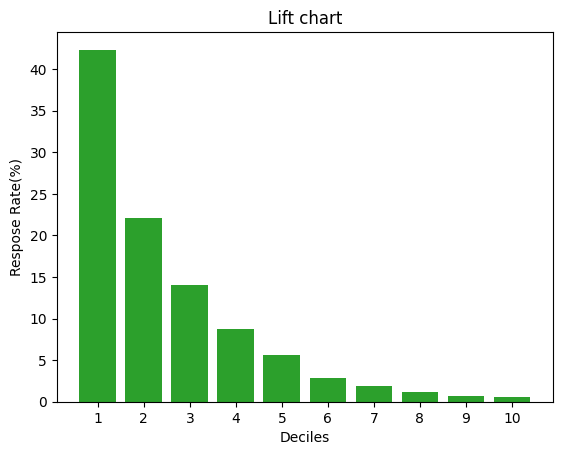

In [34]:
bar_x = np.arange(10)

plt.bar(bar_x, y_df_gb['Sensitivity']*100, color='C2')
plt.xticks(bar_x, y_df_gb['decile'])
plt.title("Lift chart")
plt.xlabel("Deciles")
plt.ylabel("Respose Rate(%)")

plt.show()

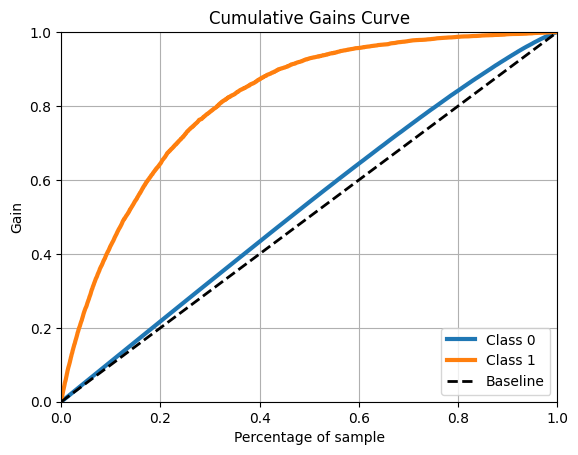

In [35]:
skplt.metrics.plot_cumulative_gain(y_test, probability)
plt.show()

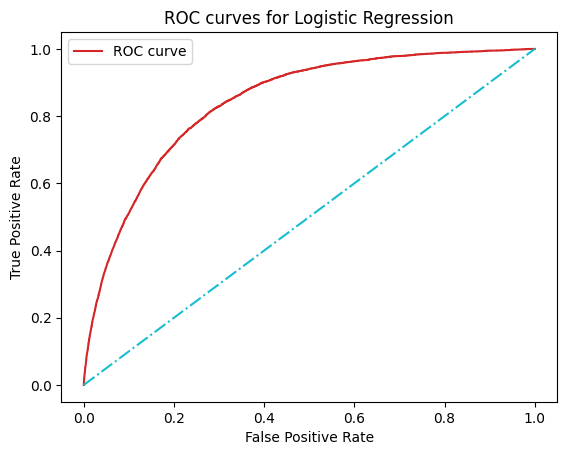

AUC 스코어:0.842


In [36]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='C3', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='C9', linestyle='-.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves for Logistic Regression')
    plt.legend()
    plt.show()

probability_cut = probability[:, 1]
fper, tper, thresholds = roc_curve(y_test, probability_cut)
plot_roc_curve(fper, tper)

auc_score = auc(fper, tper)
print('AUC 스코어:{:.3f}'.format(auc_score))